<a href="https://colab.research.google.com/github/schwallergroup/ai4chem_course/blob/main/notebooks/01 - Basics/01d_rdkit_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Basic handling of molecular data using Python

## RDKit
`RDKit` is an open-source software toolkit for cheminformatics, designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation and analysis of molecular structures, molecular descriptors, molecular fingerprints, molecular similarity, molecular visualization, and more. The toolkit is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management.

## Install dependencies

First, you'll need to install the `RDKit` library. You can do this by running `pip install rdkit`:

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 53.3 MB/s eta 0:00:00


Now that we have `rdkit` we can start importing relevant modules and downloading our example ESOL dataset.

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


Let's start looking at a specific molecule to play around with RDKit functionalities, and look at caffeine.

The name `caffeine` does not contain any structural information on the molecule. Just by having this name a computer does not know how many (heavy) atoms `caffeine` contains and what bonds they form. We need machine-accessible representations. One of the most commonly used ones is `SMILES`.

## SMILES

`SMILES` (Simplified Molecular Input Line Entry System) is a line notation representation of molecular structures. It is a way of representing chemical compounds as strings of characters, which can be easily processed and analyzed by computer algorithms.

Each SMILES string consists of symbols that represent the elements in the molecule, as well as brackets and other characters that describe the bonding between the atoms. For example, the SMILES string for ethanol (C2H5OH) would be `CCO`. In SMILES, each carbon atom is represented by the letter "C", each hydrogen atom by the letter "H", and each oxygen atom by the letter "O". The bonding between the atoms is indicated by the arrangement of the characters in the string.

SMILES is widely used in cheminformatics and computational chemistry, as it provides a compact and standardized way of representing molecular structures in a machine-readable form. This makes it possible to compare and analyze large numbers of chemical compounds, as well as to generate predictions about their properties and behavior.


 Look up the SMILES string of `caffeine` on Wikipedia/PubChem.

In [5]:
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C' # fill in the SMILES

## 1 - Basic molecule handling

In this section we will see how to do some basic operations with molecules in rdkit and to handle them in machine-readable format.

#### 1.1 - Creating and visualizing molecules

Let's start with the most basic rdkit action: creating a `Mol` object (or variable, as you prefer). `Mol` objects represent molecules, and can be created from different molecular representations (SMILES, .sdf files, etc.). We will use the basic `MolFromSmiles` function to create a variable `caffeine` representing our caffeine molecule.

In [6]:
caffeine = Chem.MolFromSmiles(caffeine_smiles)

#Note: if you try to pass directly a the caffeine SMILES string, you will get the same result

We can display the value of a variable in the notebook by typing the name and then running the cell. In this case, we can visualize the molecule this way.

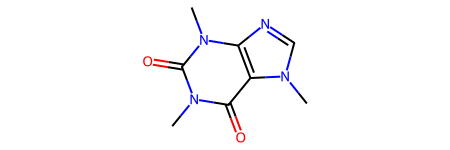

In [7]:
caffeine

Another interesting option is saving the mol object as an image. This way, you can download it or save it in your working directory. We can create an image file using the function `MolToImage` and our mol object as the argument.

In [10]:
from rdkit.Chem import Draw

#Create image file
im = Draw.MolToImage(caffeine)

#Save image as a PNG file in our current directory
im.save('caffeine.png')

Check the directory to see the image

##### Exercise 1: creating a GridImage

It is possible to create an image file containing a grid of molecules. This can be very useful when you have to show and compare molecules that are related. In this exercise, you have to create two additional mol objects, and save all the as a grid image.

In [ ]:
####YOUR CODE HERE
theobromine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)NC(=O)N2C') # insert SMILES
xanthine = Chem.MolFromSmiles('') #insert SMILES


mols = [] #create a list containing the 3 mol objects we have created
names = [] #create a list containing the names of the 3 molecules

#Now we create the GridImage
grid = Draw.MolsToGridImage( , legends=names) #pass the 'mols' list here and create the image

####END

grid #visualize your molecules!

#SOLUTION
#%load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_01.py

Is it easy to see the similarities between molecules? You can run the cell below to save the `GridImage` as a `.png` file

In [ ]:
#extract bytes and save file
png = grid.data

with open('./grid_mols.png','wb+') as outf:
    outf.write(png)

#### 1.2 - Playing with molecules

But what is actually a Mol object? Nothing simpler than a graph representing the molecule! In this graph, vertices represents the atoms and edges the bonds in the molecule. Therefore, we can retrieve the atoms and bonds from the graph and play with them.

In [ ]:
#Get total number of atoms
n_atoms = caffeine.GetNumAtoms()
print(f'N of atoms: {n_atoms}')

#Get total number of bonds
n_bonds = caffeine.GetNumBonds()
print(f'N of bonds: {n_bonds}')

We can also get the atoms and bonds as lists and get some of their properties.

In [ ]:
#create a list containing the atoms of the molecule
atoms = list(caffeine.GetAtoms())

#print the atomic number for each atom in the molecule
for atom in atoms:
    print(atom.GetAtomicNum())

#create a list containing the bonds in the molecule
bonds = list(caffeine.GetBonds())

#print only the first three bonds in the list
for bond in bonds[0:3]:
    print(bond.GetBondType())

It is possible to select atoms individually and get some of their attributes.

In [ ]:
atom = caffeine.GetAtomWithIdx(3)

print(atom.GetSymbol())
print(atom.GetTotalDegree()) #Get number of bonded atoms
print(atom.GetHybridization())

Watching the output, could you find the atom we have selected in the caffeine molecule?

#### 1.3 - Canonicalization

Although SMILES are very useful to handle molecules, they are not unique, which means that different SMILES can represent the same molecule. In the example below, we use three different SMILES that map to the same molecule.


In [ ]:
caffeine1 = '' #insert your original smiles
caffeine2 = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
caffeine3 = 'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

#Create a list of SMILES
smiles_list = [caffeine1, caffeine2, caffeine3]

#Create mols from smiles
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

#Visualize mols
Draw.MolsToGridImage(mols)

As you see, although we have introduced 3 different SMILES, we are referring to the same molecule. To avoid this, we can apply `canonicalization`. This concept refers to the generation of a unique SMILES for each molecule.

##### Exercise 2 - Canonicalization function

Write a canonicalization function and apply it to the previous list of non-canonical caffeine SMILES. We can use the `MolToSmiles` function in `rdkit` to get the SMILES of a mol object. By default, `rdkit` canonicalizes the SMILES when applying this function, so we can use it to create our canonicalization function.

In [ ]:
def canonicalize_smiles(smiles):
    '''This function takes a non-canonical SMILES and
    returns the canonical version

    Args:
        -smiles: str, non-canonical SMILES of a molecule

    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''

    ####YOUR CODE HERE

    mol = #create a mol object from input smiles

    canonical_smiles = #convert the previous mol object to SMILES using Chem.MolToSmiles()

    ####END
    return canonical_smiles

#SOLUTION
# %load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_02.py

If you apply now this function to previous non-canonical SMILES, you will obtain the canonical version (the same SMILES).

In [ ]:
#create a new list by applying your function to list of non-canonical SMILES
canonical_smiles = [canonicalize_smiles(smiles) for smiles in smiles_list]

#check new list
for smiles in canonical_smiles:
    print(smiles)

One important thing to consider is that there is no unique canonicalisation standard. The resulting SMILES will depend on the cheminformatics toolkit and the version that is used (therefore, we recommed to use the same package and version if you want to compare results).

#### 1.4 - Fingerprints

ML algorithms usually take vectors (or tensors) as inputs and operate with them. However, we are dealing with molecules. How can we transform molecules into numbers to feed our ML algorithms?

One common option is using [*molecular fingerprints*](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors). Molecular fingerprints are vectors that describe molecules as bit arrays (arrays of 1s and 0s). By using fingerprints, we can encode our structures and operate with them. There are many fingeprints available, but here we will use the [Morgan Fingerprint](https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints).

In [ ]:
from rdkit.Chem import rdFingerprintGenerator

# Create a fingerprint generator. This object is used to create any fingerprint
# from a specific familiy. In this case, we select the Morgan Fingerprint with
# radius 2 and 2048 dimensions (bits). These parameters are commonly used)
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)

#We use the GetMorganFingerprintAsBitVect to create the fingerprint
caffeine_fp = mfpgen.GetFingerprint(caffeine)

print(caffeine_fp.GetNumBits()) #print vector length

caffeine_fp.ToList() #visualize vector as list

##### Exercise 3 - Molecular similarity using Tanimoto distance

In this exercise, we will see how we can extract chemical information using fingerprints and [Tanimoto similarity](https://en.wikipedia.org/wiki/Jaccard_index). `Tanimoto similarity` measures how similar two fingerprints are. We can use this metric to compare groups of molecules and decide which ones are chemically similar (intuitively, which molecules share more common substructures).

As an example, you have to create the `Morgan fingerprints` (r=2, nBits=1024) of toluene and theobromine, and then use the `Tanimoto similarity` to decide which one is more similar to caffeine. `Tanimoto similarity` quantifies how many bits two binary vectors have in common.

In [ ]:
#Remember that we have previously created the caffeine fingerprint and the theobromine mol object
from rdkit.DataStructs import FingerprintSimilarity

####YOUR CODE
toluene = Chem.MolFromSmiles() #insert toluene SMILES

#Now, create the fingerprints of theobromine and toluene
toluene_fp = mfpgen.GetFingerprint()#insert corresponding values
theobromine_fp =  mfpgen.GetFingerprint()#same for theobromine

#Now we calculate Tanimoto Similarity
sim1 = FingerprintSimilarity( , ) #insert fingerprints to compare
sim2 = FingerprintSimilarity( , ) #same than before

####END

#We can now print each similarity
print(f'Caffeine-toluene similarity: {round(sim1, 3)}'.format())
print(f'Caffeine-theobromine similarity: {round(sim2, 3)}')


#SOLUTION
# %load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_03.py

Uncomment the following line to see the solution

In [ ]:
#SOLUTION
#%load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_03.py

Does this result make sense for you?

#### 1.5 - Bemis-Murcko Scaffold

It is possible to decompose molecule into basic scaffolds or core molecular motifs. A common method is the [Bemis-Murcko](https://pubs.acs.org/doi/10.1021/jm9602928) decomposition. This method returns a simplified framework of a molecule that can be useful to compare or group different types of substances. `Bemis-Murcko` scaffolds can be easily obtained in `rdkit`.

In [ ]:
from rdkit.Chem.Scaffolds import MurckoScaffold

#Get Murcko Scaffold from a mol object
caff_scaffold = MurckoScaffold.GetScaffoldForMol(caffeine)

#Show original molecule
display(caffeine)

#Show Murcko scaffold
caff_scaffold

We can compare caffeine and theobromine scaffolds to realize these molecules are very similar

In [ ]:
#compute theobromine scaffold
theobr_scaffold = MurckoScaffold.GetScaffoldForMol(theobromine)

#draw both scaffolds as a GridImage
Draw.MolsToGridImage([caff_scaffold, theobr_scaffold], legends=['caffeine scaffold', 'thebromine scaffold'])

## 2 - Combining RDKit with Pandas

The next step is to convert the data in the `df` dataframe into mol objects that can be processed by RDKit. You can do this using the `PandasTools.AddMoleculeColumnToFrame` function.

To do that we will not use the `Compound ID` column (as it only contains names, and not the actual structure), but we will use the `smiles` column in our ESOL dataset. First, we load the dataset and take only some columns.

In [ ]:
# get the dataset
df = pd.read_csv("https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/01%20-%20Basics/data/delaney-processed.csv" )

#Take only Compound ID, smiles and solubility
df = df[['Compound ID', 'smiles', 'measured log solubility in mols per litre']]

#Rename solubility column
df = df.rename(columns={'measured log solubility in mols per litre': 'solubility'})
df.head()

Now we use `AddMoleculeColumnToFrame` to add a new column containing the mol objects.

In [ ]:
# Convert SMILES into Mol objects
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='Molecule')
df.head()

As you see, the final df contains a column named `Molecule` with the corresponding mol objects. These objects can be manipulated using the same functions we have learned in the previous section. It is also possible to directly visualize the molecules in `df`.

In [ ]:
#display df with molecules
df

#### 2.1 - Applying functions to df

One useful option when working with pandas DataFrames is applying the same operation to all the examples we have in the dataframe. We can do these by using the `apply` function, as you see in the example below.

In [ ]:
#apply canonical smiles to our df
df['canonical_smiles'] = df['smiles'].apply(canonicalize_smiles) #we apply our custom function to the 'smiles' column

#drop old 'smiles' column
df = df.drop(columns='smiles')

df.head()

As you see, our `df` now contains a new column called `canonical_smiles` that is obtained by applying our previously created `canonicalize_smiles` function to the previous `smiles` column of `df`.

##### Exercise 4 - Computing Molecular Weight

We will now use the apply() function to compute the molecular weight of all our molecules. This function takes a mol object as input and returns its molecular wieight.

In [ ]:
from rdkit.Chem.Descriptors import MolWt

####YOUR CODE
df['MW'] = #use the apply function on the 'Molecule' column to compute MolWt

####END

df.head()

#SOLUTION
# %load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_04.py

As you can see, a new column `MW` containing the molecular weights of the molecule appears.

#### 2.2 - Computing Molecular Descriptors

Molecular weight is one of the properties we can compute from a molecule. Apart from fingerprints, ML algorithms can take as input numbers describing the molecules we are interested in, as the molecular weight or the `logP`. We call these attributes `molecular descriptors`.

`rdkit` provides several molecular descriptors, that we can find in detail [here](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors). Below we show a basic calculation of multiple descriptors for the molecules in the dataframe.

In [ ]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

#Define a list with the name of the descriptors you are interested in
descriptors=[
        'TPSA',
        'MolLogP',
        'NumHAcceptors',
        'NumHDonors',
        'RingCount',
        'NumAromaticHeterocycles'
    ]

#create a descriptor calculator containing the descriptors specified in the list
calculator = MolecularDescriptorCalculator(descriptors)

#Compute descriptors for each molecule in the df by using apply() and the calculator object
properties = df['Molecule'].apply(calculator.CalcDescriptors)

#create a dataframe containing the computed descriptors
df_properties = pd.DataFrame(properties.tolist(), columns=descriptors)

df_properties.head()


As you see, we have created a dataframe with the properties we were interested in for each molecule.

There are also specific libraries like [mordred](https://github.com/mordred-descriptor/mordred) that make possible to compute hundreds of descriptors for the same molecule. In the following session we will see how we can compute descriptors for feeding ML models in more detail.

#### 2.3 - Substructure search

In the last section, we will see how to look for structural patterns in molecules, a very important task when we are dealing with many different types of substances or we are trying to extract chemical information from our datasets.

We can use SMILES to create a pattern we are interested in. In the example below, we create two patterns and check if our `caffeine` molecule contains them.

In [ ]:
#create patterns as mol objects
patt1 = Chem.MolFromSmiles('C=O')
patt2 = Chem.MolFromSmiles('CC(N)C')

#display patterns
Draw.MolsToGridImage([patt1, patt2], legends=['pattern1', 'pattern2'], molsPerRow=2)

Now we can check if the caffeine mol object contains any of the two pattern using the method HasSubstructMatch()

In [ ]:
check_p1 = caffeine.HasSubstructMatch(patt1)
print('Contains pattern 1: {}'.format(check_p1))

check_p2 = caffeine.HasSubstructMatch(patt2)
print('Contains pattern 2: {}'.format(check_p2))

As you see, `caffeine` contains pattern 1 (carbonyl) but not pattern 2 (amine).

It is also possible to use a more detailed language for substructure searching called [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html). `SMARTS` are an extension of `SMILES` and allow us to specify substructures with several structural patterns. Below you can see an example of substructure matching using `SMARTS`.

In [ ]:
from IPython.display import SVG

#create pattern. This pattern means any carbon atom that is contained on a ring
patt = '[#6;r]'

patt = Chem.MolFromSmarts(patt)

#Here we get all the atoms matching the previous pattern
matches = caffeine.GetSubstructMatches(patt)

#we create a list containing the matching atoms (as indexes)
highlightAtomLists = [atom[0] for atom in matches]

#Finally, we display the image of the molecule with the highlighted matching atoms
SVG(Draw._MolsToGridSVG([caffeine], highlightAtomLists=[highlightAtomLists], molsPerRow=1))

##### Exercise 5: Substructure search

In this exercise, you will use `SMILES` and `SMARTS` to filter our solubility dataset and keep only the molecules that match certain substructure patterns. First, you have to get all the molecules that contain a phenyl ring using a `SMILES` pattern.

In [ ]:
###YOUR CODE

#create pattern
phenyl = Chem.MolFromSmiles('')

#apply HasSubstructureMatch to each molecule (we use a lambda function here)
df['phenyl'] = df['Molecule'].apply(lambda x: x.HasSubstructMatch()) #use phenyl object for the query

###END

#display rows that contain only the phenyl substructure
df_phenyl = df[df['phenyl']]
print(f'There are {len(df_phenyl)} molecules containing a phenyl ring')
df_phenyl.head()


Now we use `SMARTS` to retrieve all molecules containing a ring.

In [ ]:
#### YOUR CODE
ring = Chem.MolFromSmarts('') #look for the SMARTS specification corresponding to any ring

df['ring'] = #proceed as in the previous case

### END

#display rows that contain only the phenyl substructure
df_ring = df[df['ring']]
print(f'There are {len(df_ring)} molecules containing a ring')
df_ring.head()

Check the solution for each part.

In [ ]:
# %load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_05.py

## Conclusion

During this session, we have seen how to use `rdkit` to handle basic molecule operations, create fingerprints to compare different substances, compute descriptors and look for substructure matches. These are common tasks in cheminformatics and ML, so we encourage you to keep practising to master them!

Here you have more resources to get more details about chemoinformatics:
- https://iwatobipen.wordpress.com/
- https://greglandrum.github.io/rdkit-blog/
- https://www.rdkit.org/docs/Cookbook.html